<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/Deep_Shallow_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up The NN
First we need to import the data from Keras. This sets up the data by flattening it from 28x28 images to vectors of length 784

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are 'fully connected'
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# x = input data, y = lables
# Train data is used by our model
# Test data is kept hidden from the model until the end
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening to use in future segments
x_train_drawing = x_train

# Flattens the images
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


# Setting up our networks

To stay consitstent and keep the same hyperparameters over all our networks we have made two functions, one for creating the network and another for training it and showing the results. This will ensure we will be able to compare between the models we make.

In [ ]:
#import pandas as pd
#import lightgbm as lgb
#from sklearn.model_selection import train_test_split
import time
"""SEARCH_PARAMS = {'layer_size': 1,
                'batch_size': 128,
                 'epochs': 5}"""


# Produces a fully connected neural network from the input array
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model






# Will train the model and can print out a graph and the results
def evaluate(model, batch_size=128, epochs=5, verbose=True):

    if verbose==True:
      # print string summary of the network
      model.summary() 

    #config the model with losses and metrics
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


    #TRAIN - model 
    start = time.time()
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    print("Train time"+ str(time.time()-start))
    #print(timeit.timeit(train, number=3)/3)
    
    
    
    #TEST - loss value & metrics values for the model
    start = time.time()
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print("Test time:" + str(time.time()-start))
    #print(timeit.timeit(test, number=3)/3)
   

    if verbose==True:
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['training', 'validation'], loc='best')
      plt.show()

    if verbose==True:
      print(f'Test loss: {loss:.3}')
      print(f'Test accuracy: {accuracy:.3}')

    return accuracy  

# Creating The First Network

This network only has a single hidden layer with 32 nodes.

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 4096)              3215360   
_________________________________________________________________
dense_133 (Dense)            (None, 10)                40970     
Total params: 3,256,330
Trainable params: 3,256,330
Non-trainable params: 0
_________________________________________________________________
Train time78.35132598876953
Test time:0.7671411037445068


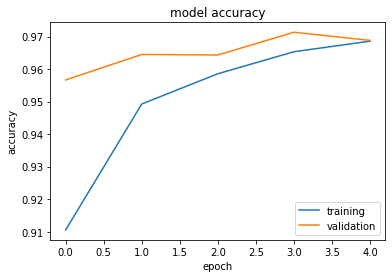

Test loss: 0.122
Test accuracy: 0.966


0.9660999774932861

In [ ]:
model = create_dense([4096])
evaluate(model, batch_size=16)

We can run this multiple times and take an average for the accuracy.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


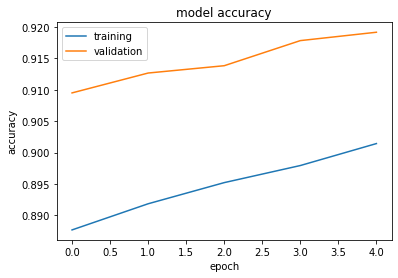


Test loss: 0.369
Test accuracy: 0.905
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


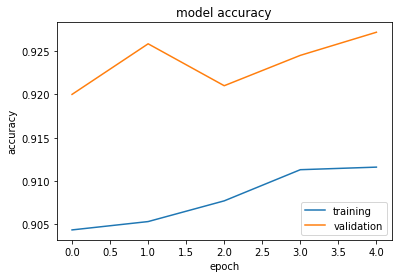


Test loss: 0.326
Test accuracy: 0.915
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


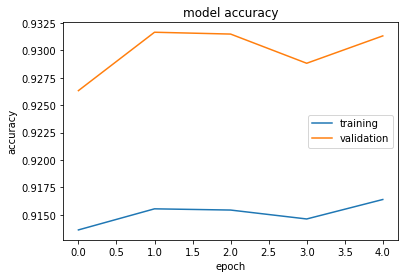


Test loss: 0.297
Test accuracy: 0.921
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


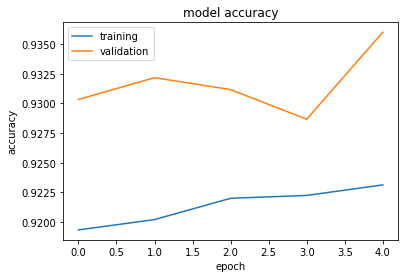


Test loss: 0.286
Test accuracy: 0.924
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


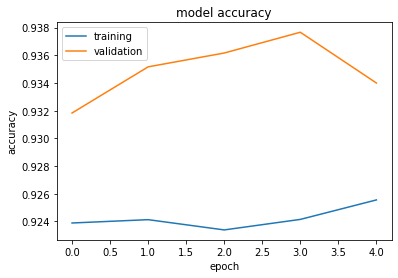


Test loss: 0.267
Test accuracy: 0.925

Average Accuracy: 0.918


In [ ]:
totalAccuracy = 0
for x in range(0,5):
  totalAccuracy += evaluate(model)

print()
print(f"Average Accuracy: {totalAccuracy/5:.3}")
  

# Fine-tune hyperparameters
Optimising: number of neurons, activation function, batch size, number of epochs



Increasing the number of neurons (nodes) in hidden layer

In [ ]:
for n_nodes in range(1,50,2):
  model = create_dense([n_nodes])
  print("n_nodes=%d, accuracy=%.2f%%" % (n_nodes, evaluate_graphless(model)))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
n_nodes=1, accuracy=0.21%
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_66 (Dense)             (None, 10)                40        
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________
n_no

KeyboardInterrupt: ignored

Activation function:

Number of epochs

# Increasing Depth
Increases the number of hidden layers from 1 to 4, each hidden layer has 32 nodes.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train time8.381627082824707
Test time:0.6243014335632324


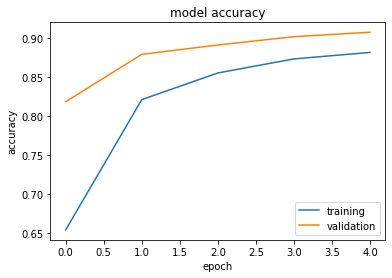

Test loss: 0.482
Test accuracy: 0.896
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train time7.402970790863037
Test time:0.6401324272155762


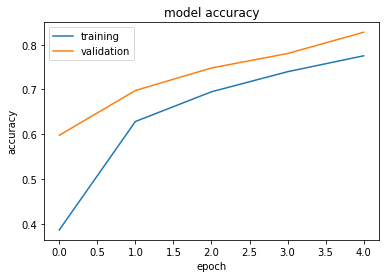

Test loss: 1.13
Test accuracy: 0.803
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Train time7.697406053543091
Test time:0.6531426906585693


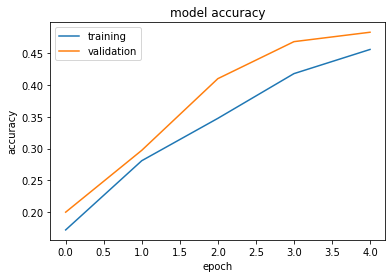

Test loss: 2.12
Test accuracy: 0.48
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Train time8.192507982254028
Test time:0.6737015247344971


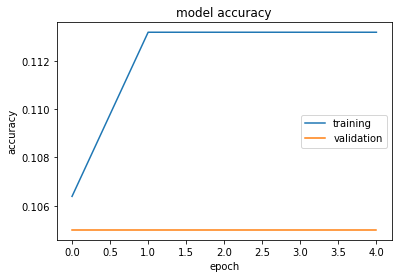

Test loss: 2.29
Test accuracy: 0.113


In [ ]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

It seems as if adding more layers decreaces the accuracy.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Train time59.71096754074097
Test time:0.63155198097229


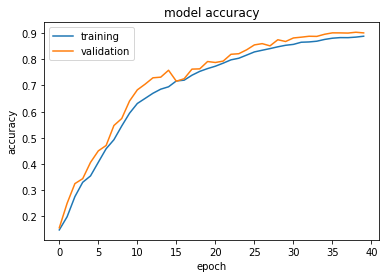

Test loss: 0.478
Test accuracy: 0.888


0.8877000212669373

In [ ]:
model = create_dense([32,32,32])
evaluate(model, epochs=40)

I single hidden layer still seems to work better than multiple.

# Layer Width

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_117 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Train time6.854826927185059
Test time:0.6128692626953125


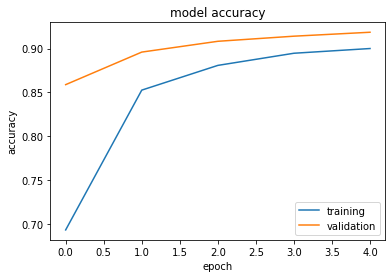

Test loss: 0.369
Test accuracy: 0.908
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_119 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train time6.840423822402954
Test time:0.6384811401367188


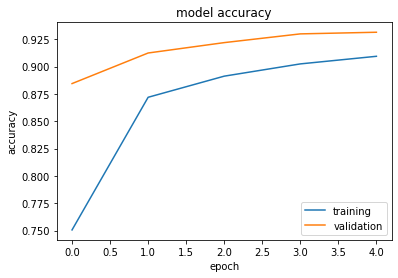

Test loss: 0.317
Test accuracy: 0.915
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_121 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train time7.136890888214111
Test time:0.6807963848114014


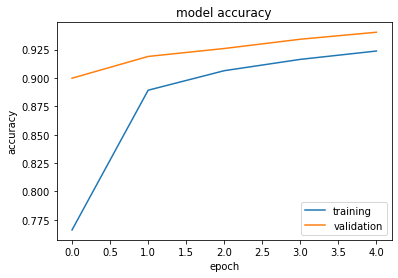

Test loss: 0.275
Test accuracy: 0.927
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_123 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train time7.719753980636597
Test time:0.6524221897125244


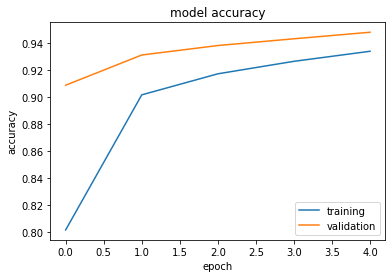

Test loss: 0.24
Test accuracy: 0.934
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_125 (Dense)            (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Train time8.458382368087769
Test time:0.692943811416626


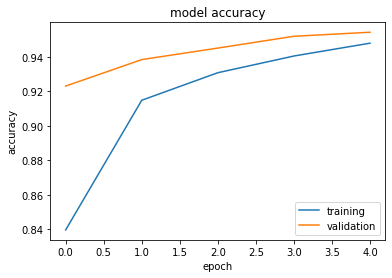

Test loss: 0.208
Test accuracy: 0.942
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_127 (Dense)            (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Train time9.849421501159668
Test time:0.7240166664123535


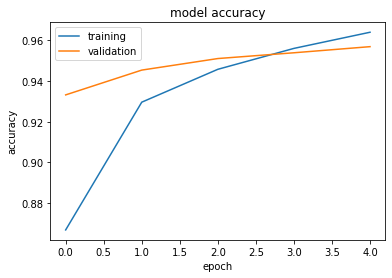

Test loss: 0.175
Test accuracy: 0.948


In [ ]:
for nodes in [64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

# Combining Width and Depth

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_142 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


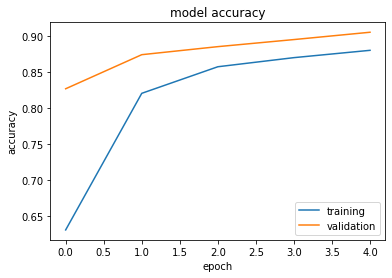


Test loss: 0.489
Test accuracy: 0.895
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_144 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_145 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


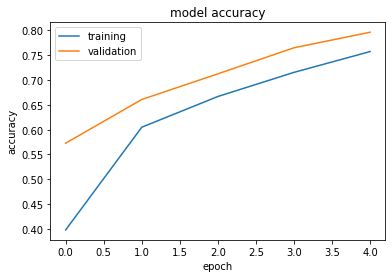


Test loss: 1.19
Test accuracy: 0.78
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_147 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_148 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_149 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


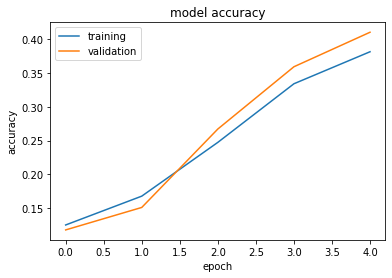


Test loss: 2.17
Test accuracy: 0.416
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_151 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_152 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_153 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_154 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


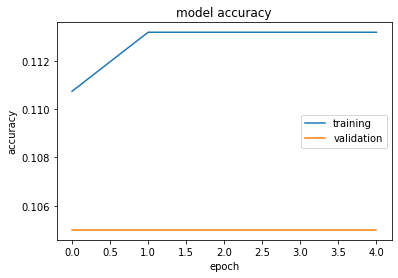


Test loss: 2.29
Test accuracy: 0.113
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_156 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


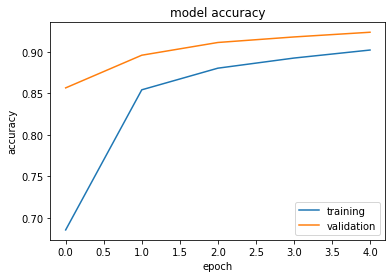


Test loss: 0.371
Test accuracy: 0.906
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_158 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_159 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


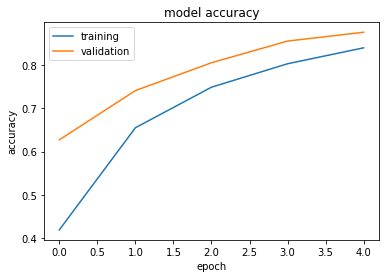


Test loss: 0.82
Test accuracy: 0.86
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_161 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_162 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_163 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


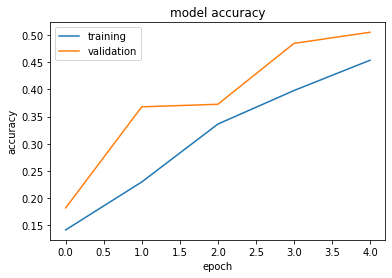


Test loss: 2.0
Test accuracy: 0.475
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_165 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_166 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_167 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_168 (Dense)            (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


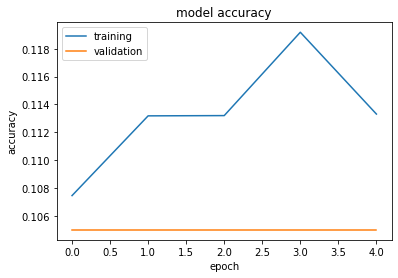


Test loss: 2.29
Test accuracy: 0.114
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_170 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


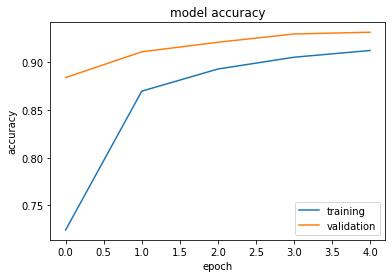


Test loss: 0.31
Test accuracy: 0.918
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_172 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_173 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


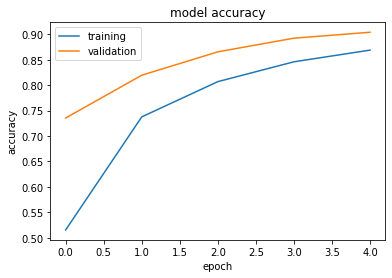


Test loss: 0.581
Test accuracy: 0.883
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_175 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_176 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_177 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


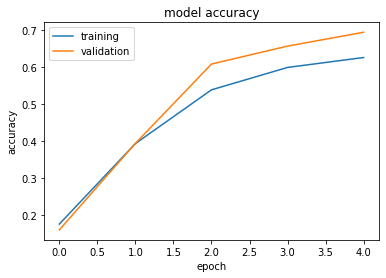


Test loss: 1.72
Test accuracy: 0.672
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_179 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_180 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_181 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_182 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


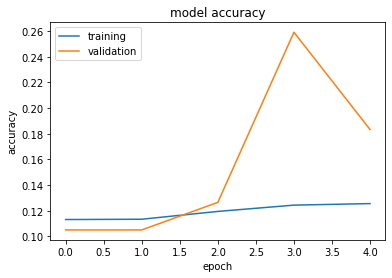


Test loss: 2.29
Test accuracy: 0.174
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_184 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


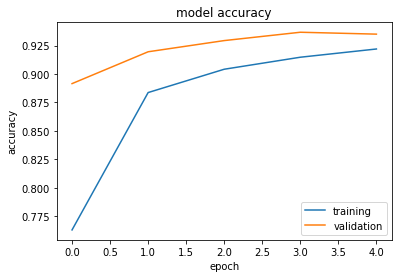


Test loss: 0.267
Test accuracy: 0.928
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_185 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_186 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_187 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


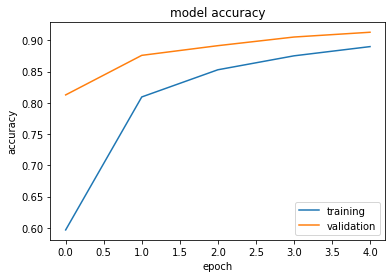


Test loss: 0.442
Test accuracy: 0.898
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_189 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_190 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_191 (Dense)            (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


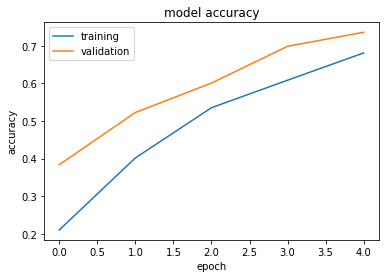


Test loss: 1.34
Test accuracy: 0.708
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_193 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_194 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_195 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_196 (Dense)            (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________


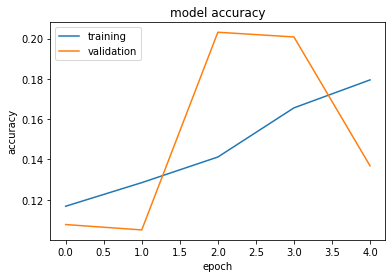


Test loss: 2.27
Test accuracy: 0.144
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_198 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


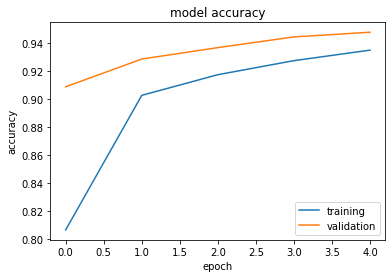


Test loss: 0.236
Test accuracy: 0.935
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_200 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_201 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


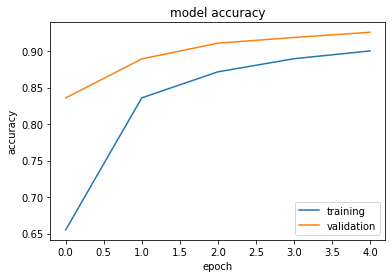


Test loss: 0.369
Test accuracy: 0.91
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_202 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_203 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_204 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_205 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


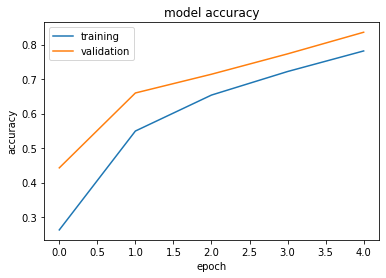


Test loss: 0.896
Test accuracy: 0.81
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_207 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_208 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_209 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_210 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


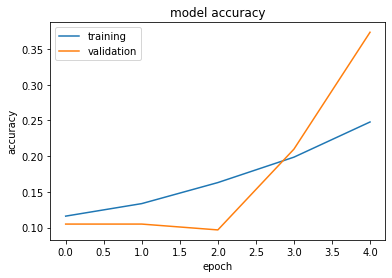


Test loss: 2.24
Test accuracy: 0.371
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_212 (Dense)            (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


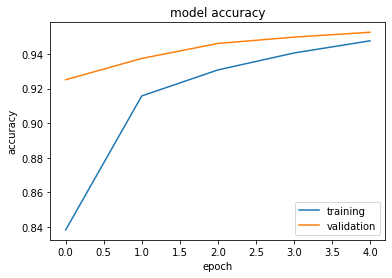


Test loss: 0.205
Test accuracy: 0.942
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_214 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_215 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


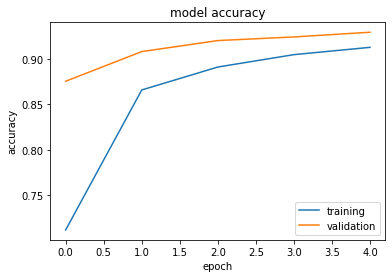


Test loss: 0.313
Test accuracy: 0.917
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_217 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_218 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_219 (Dense)            (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


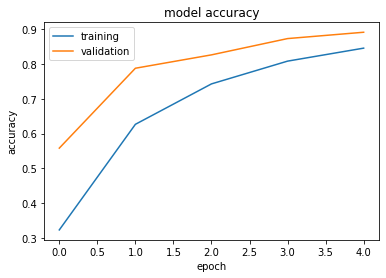


Test loss: 0.619
Test accuracy: 0.866
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_221 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_222 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_223 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_224 (Dense)            (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________


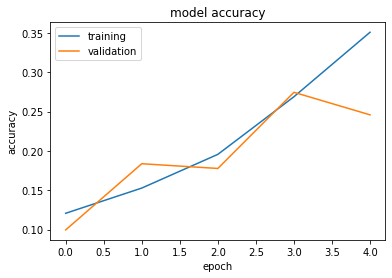


Test loss: 2.12
Test accuracy: 0.253
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_226 (Dense)            (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


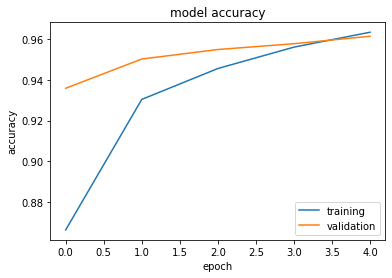


Test loss: 0.175
Test accuracy: 0.95
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_228 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_229 (Dense)            (None, 10)                20490     
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________


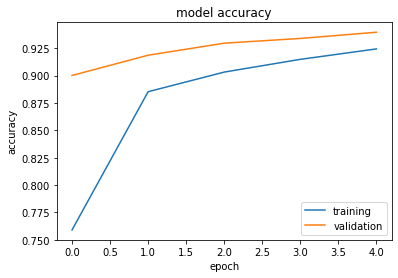


Test loss: 0.272
Test accuracy: 0.925
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_230 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_231 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_232 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_233 (Dense)            (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________


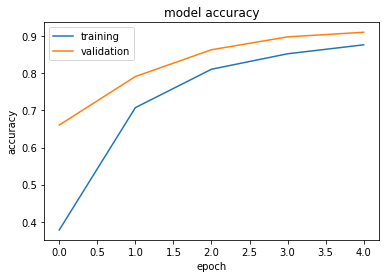


Test loss: 0.452
Test accuracy: 0.89
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 2048)              1607680   
_________________________________________________________________
dense_235 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_236 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_237 (Dense)            (None, 2048)              4196352   
_________________________________________________________________
dense_238 (Dense)            (None, 10)                20490     
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
_________________________________________________________________


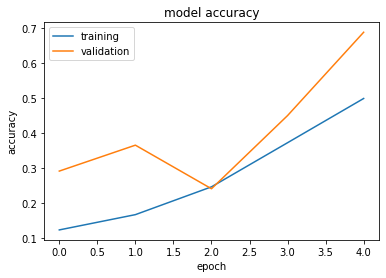


Test loss: 1.65
Test accuracy: 0.668


In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
  for layers in range(1, 5):
    model = create_dense([nodes] * layers)
    evaluate(model)
    

# Decreasing Batch Size

In [ ]:
for batch in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([32,32,32])
    evaluate_graphless(model, batch_size= batch)

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_253 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_254 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_255 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_256 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.975
Test accuracy: 0.749
Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 32)               

Decreasing the batch size help to reduce the over fitting slightly, however it increase the trainin time by a lot

#Decreased batch size, 3 layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20490     
Total params: 10,020,874
Trainable params: 10,020,874
Non-trainable params: 0
_________________________________________________________________
Train time408.9196705818176
Test time:0.5766603946685791


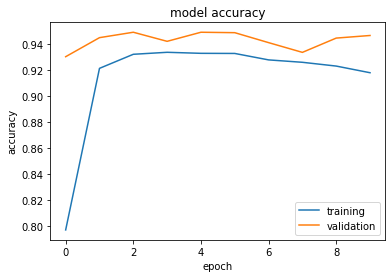

Test loss: 0.209
Test accuracy: 0.937


0.9365000128746033

In [ ]:
model = create_dense([2048,2048,2048])
evaluate(model, batch_size=8, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                20490     
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
_________________________________________________________________
Train time170.3317518234253
Test time:1.2926783561706543


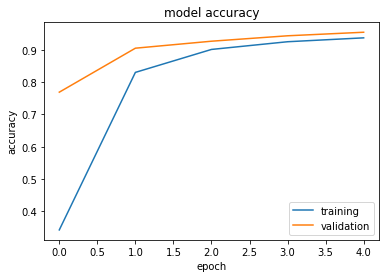

Test loss: 0.193
Test accuracy: 0.948


0.9484999775886536

In [ ]:
model = create_dense([2048,2048,2048,2048])
evaluate(model, batch_size=16)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total params: 3,962,890
Trainable params: 3,962,890
Non-trainable params: 0
_________________________________________________________________
Train time469.94620990753174
Test time:0.9643146991729736


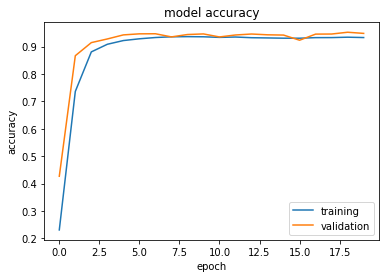

Test loss: 0.216
Test accuracy: 0.934


0.9337000250816345

In [ ]:
model = create_dense([1024,1024,1024,1024])
evaluate(model, batch_size=16, epochs=20)

In [ ]:
model = create_dense([2048,2048,2048,2048])
evaluate(model, batch_size=4,epochs=30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20490     
Total params: 14,217,226
Trainable params: 14,217,226
Non-trainable params: 0
_________________________________________________________________
